Fraud Detection
=

Sure, here's a more detailed explanation of each step:

---

### Import Relevant Libraries/Modules
Start by importing the necessary libraries and modules for data analysis, visualization, and machine learning. Common libraries include:
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Matplotlib/Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning algorithms and model evaluation.

### Basic EDA (Exploratory Data Analysis)
Perform initial data exploration to understand the dataset's structure and main characteristics. This includes:
- **Descriptive Statistics**: Summarize the main features of the dataset, such as mean, median, and standard deviation.
- **Data Types**: Check the data types of each column to ensure they are appropriate for analysis.

### Missing Data
Identify and handle missing data in the dataset:
- **Detection**: Use methods like `isnull()` to find missing values.
- **Handling**: Decide how to handle missing data, such as removing rows/columns with missing values or imputing them with mean/median/mode.

### Duplicate Data
Check for and remove duplicate entries in the dataset to ensure data quality:
- **Detection**: Use methods like `duplicated()` to find duplicates.
- **Removal**: Remove duplicate rows to avoid bias in the analysis.

### Outliers and Anomalies
Identify and handle outliers and anomalies that may skew the analysis:
- **Detection**: Use statistical methods or visualization techniques like box plots to detect outliers.
- **Handling**: Decide whether to remove or transform outliers based on their impact on the analysis.

### Data Visualization
Create visualizations to better understand the data and identify patterns or trends:
- **Histograms**: For distribution of numerical data.
- **Box Plots**: For detecting outliers.
- **Scatter Plots**: For relationships between variables.
- **Heatmaps**: For correlation between variables.

### Model Building
Build and evaluate machine learning models to predict or classify outcomes:

1. **Separate Your Independent and Dependent Variables**
   - **Independent Variables (Features)**: The input variables used to make predictions.
   - **Dependent Variable (Target)**: The output variable you want to predict.

2. **Split Your Data into Train and Test Sets**
   - **Training Set**: Used to train the model.
   - **Test Set**: Used to evaluate the model's performance on unseen data.

3. **Model Selection**
   - Choose appropriate machine learning algorithms based on the problem (e.g., classification, regression).
   - Common algorithms include Logistic Regression, Decision Trees, Random Forests, and Neural Networks.

4. **Model Training**
   - Train the selected model(s) using the training data.
   - Tune hyperparameters to optimize model performance.

5. **Model Evaluation**
   - Evaluate the model's performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
   - Use the test set to assess how well the model generalizes to new data.

---

Does this provide a clearer and more detailed overview of the steps involved?

Import Necessary Libraries
-

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

Read the DataFrame
-

In [2]:
df = pd.read_csv('Credit_Card_Fraud_Detection.csv')
df.head()

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
df.tail()

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
685,685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
689,689,15592412,1,41.00,0.040,2,10,4,0.040,0,1,1,0,1,560,1,1


In [4]:
df.shape

(690, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   690 non-null    int64  
 1   Customer_ID  690 non-null    int64  
 2   A_1          690 non-null    int64  
 3   A_2          690 non-null    float64
 4   A_3          690 non-null    float64
 5   A_4          690 non-null    int64  
 6   A_5          690 non-null    int64  
 7   A_6          690 non-null    int64  
 8   A_7          690 non-null    float64
 9   A_8          690 non-null    int64  
 10  A_9          690 non-null    int64  
 11  A_10         690 non-null    int64  
 12  A_11         690 non-null    int64  
 13  A_12         690 non-null    int64  
 14  A_13         690 non-null    int64  
 15  A_14         690 non-null    int64  
 16  class        690 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 91.8 KB


In [6]:
df.describe()

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
count,690.000000,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,344.500000,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,199.330128,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,172.250000,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,344.500000,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,516.750000,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,689.000000,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


Missing Data
-

In [7]:
df.isna().sum()

Unnamed: 0     0
Customer_ID    0
A_1            0
A_2            0
A_3            0
A_4            0
A_5            0
A_6            0
A_7            0
A_8            0
A_9            0
A_10           0
A_11           0
A_12           0
A_13           0
A_14           0
class          0
dtype: int64

Duplicate Data
-

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [8]:
df.duplicated().sum()

0

In [13]:
#Distribution of normal and fake transaction

unbalanced and balanced data
-

In [10]:
df['class'].value_counts()

class
0    383
1    307
Name: count, dtype: int64

its highly unbalanced

0 = Normal Transaction
1 = Faka Transaction

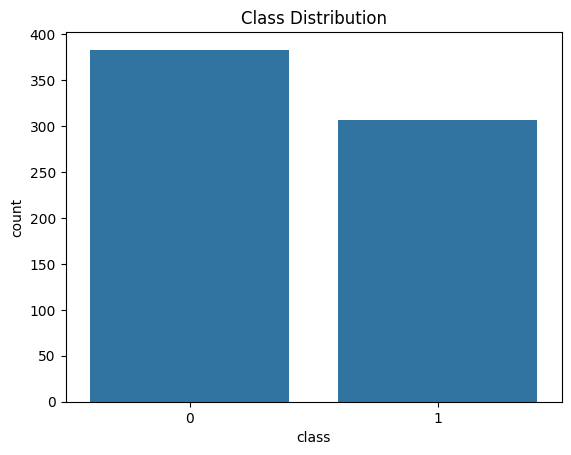

In [18]:

sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

<Axes: >

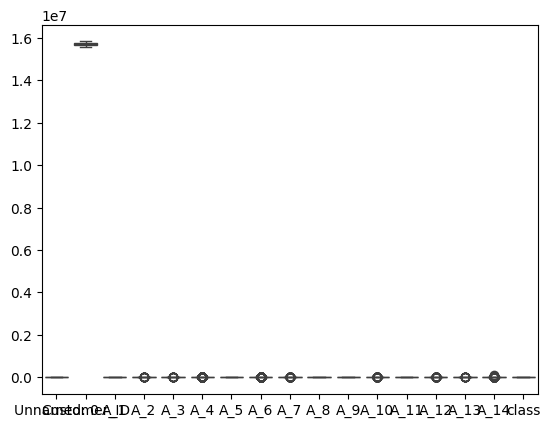

In [13]:
sns.boxplot(df)

IOR
-

In [23]:
Q1 = df.quantile(0.25) #25%of data
Q3 = df.quantile(0.75) #75% of data

IQR = Q3 - Q1
IQR

Unnamed: 0        344.5000
Customer_ID    120209.0000
A_1                 1.0000
A_2                15.0375
A_3                 6.2075
A_4                 0.0000
A_5                 6.0000
A_6                 1.0000
A_7                 2.4600
A_8                 1.0000
A_9                 1.0000
A_10                3.0000
A_11                1.0000
A_12                0.0000
A_13              192.0000
A_14              395.5000
class               1.0000
dtype: float64

In [24]:
print(Q1- 1.5*IQR)
print()
print(Q3 + 1.5*IQR)

Unnamed: 0    -3.445000e+02
Customer_ID    1.545137e+07
A_1           -1.500000e+00
A_2            1.137500e-01
A_3           -8.311250e+00
A_4            2.000000e+00
A_5           -5.000000e+00
A_6            2.500000e+00
A_7           -3.525000e+00
A_8           -1.500000e+00
A_9           -1.500000e+00
A_10          -4.500000e+00
A_11          -1.500000e+00
A_12           2.000000e+00
A_13          -2.080000e+02
A_14          -5.922500e+02
class         -1.500000e+00
dtype: float64

Unnamed: 0     1.033500e+03
Customer_ID    1.593221e+07
A_1            2.500000e+00
A_2            6.026375e+01
A_3            1.651875e+01
A_4            2.000000e+00
A_5            1.900000e+01
A_6            6.500000e+00
A_7            6.315000e+00
A_8            2.500000e+00
A_9            2.500000e+00
A_10           7.500000e+00
A_11           2.500000e+00
A_12           2.000000e+00
A_13           5.600000e+02
A_14           9.897500e+02
class          2.500000e+00
dtype: float64


In [25]:
df.shape

(690, 17)

In [26]:
# if the df value is smaller than lower quadirnt(IQL) OR the Df is gratter than upper quadient data
df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
1,1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
6,6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
14,14,15599440,1,58.58,2.710,2,8,4,2.415,0,0,0,1,2,320,1,0
17,17,15790254,0,18.92,9.000,2,6,4,0.750,1,1,2,0,2,88,592,1
22,22,15694530,1,41.17,1.335,2,2,4,0.165,0,0,0,0,2,168,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,664,15652667,1,20.00,0.000,2,2,4,0.500,0,0,0,0,2,144,1,0
668,668,15606554,0,32.25,1.500,2,8,4,0.250,0,0,0,1,2,372,123,0
670,670,15672357,0,37.75,5.500,2,11,4,0.125,1,0,0,1,2,228,1,1
686,686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0


Feature Selection
-

In [27]:
df

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [28]:
df.corr

<bound method DataFrame.corr of      Unnamed: 0  Customer_ID  A_1    A_2     A_3  A_4  A_5  A_6    A_7  A_8  \
0             0     15776156    1  22.08  11.460    2    4    4  1.585    0   
1             1     15739548    0  22.67   7.000    2    8    4  0.165    0   
2             2     15662854    0  29.58   1.750    1    4    4  1.250    0   
3             3     15687688    0  21.67  11.500    1    5    3  0.000    1   
4             4     15715750    1  20.17   8.170    2    6    4  1.960    1   
..          ...          ...  ...    ...     ...  ...  ...  ...    ...  ...   
685         685     15808223    1  31.57  10.500    2   14    4  6.500    1   
686         686     15769980    1  20.67   0.415    2    8    4  0.125    0   
687         687     15675450    0  18.83   9.540    2    6    4  0.085    1   
688         688     15776494    0  27.42  14.500    2   14    8  3.085    1   
689         689     15592412    1  41.00   0.040    2   10    4  0.040    0   

     A_9  A_10  A_1

<Axes: >

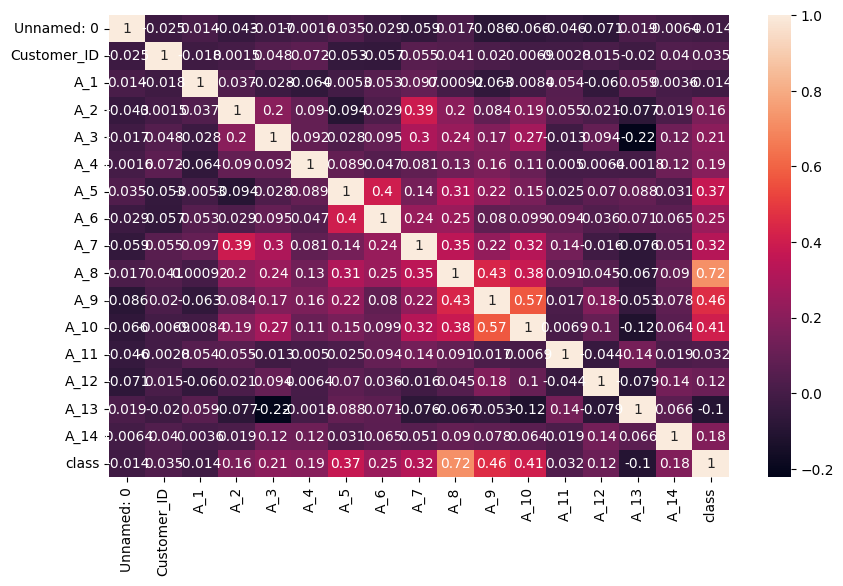

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

Model Bulding
-

In [30]:

df.head()

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [31]:
x= df.iloc[:, :-1]
x

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14
0,0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213
1,1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1
2,2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1
3,3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1
4,4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1
686,686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45
687,687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1
688,688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12


In [33]:
y = df['class']
y

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: class, Length: 690, dtype: int64

In [34]:
x_train, x_test, y_train, y_test= train_test_split( x, y, test_size= 0.2, random_state=42)

In [35]:
x_train

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14
278,278,15571284,1,32.83,2.500,2,13,8,2.750,1,1,6,0,2,160,2073
110,110,15688210,1,38.25,10.125,1,4,4,0.125,0,0,0,0,2,160,1
82,82,15672894,0,18.58,10.000,2,2,4,0.415,0,0,0,0,2,80,43
51,51,15720529,1,21.08,4.125,1,3,8,0.040,0,0,0,0,2,140,101
218,218,15720353,1,19.50,0.290,2,4,4,0.290,0,0,0,0,2,280,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,15608595,0,30.42,1.375,2,9,8,0.040,0,1,3,0,2,0,34
106,106,15597536,1,27.67,2.000,2,14,8,1.000,1,1,4,0,2,140,7545
270,270,15675926,0,19.17,5.415,2,3,8,0.290,0,0,0,0,2,80,485
435,435,15687527,1,16.08,0.750,2,8,4,1.750,1,1,5,1,2,352,691


In [36]:
x_test

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14
286,286,15725028,1,65.42,11.000,2,10,9,20.000,1,1,7,1,2,22,1
511,511,15729377,1,18.17,10.250,2,8,8,1.085,0,0,0,0,2,320,14
257,257,15585928,1,48.50,4.250,2,7,4,0.125,1,0,0,1,2,225,1
336,336,15679394,0,36.00,1.000,2,8,4,2.000,1,1,11,0,2,0,457
318,318,15734008,0,15.75,0.375,2,8,4,1.000,0,0,0,0,2,120,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,333,15711635,1,36.17,0.420,1,9,4,0.290,0,0,0,1,2,309,3
507,507,15700300,1,17.58,10.000,2,9,8,0.165,0,1,1,0,2,120,2
24,24,15605791,1,19.50,9.585,2,6,4,0.790,0,0,0,0,2,80,351
158,158,15627699,1,22.67,1.585,1,9,4,3.085,1,1,6,0,2,80,1


In [37]:
y_train

278    1
110    0
82     0
51     0
218    0
      ..
71     0
106    1
270    0
435    1
102    1
Name: class, Length: 552, dtype: int64

In [38]:
y_test

286    1
511    0
257    1
336    1
318    0
      ..
333    0
507    0
24     0
158    1
518    1
Name: class, Length: 138, dtype: int64

In [39]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

Model Selection
-

**Logistic Regression**

In [40]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [41]:
print(f'Traning Accuracy : {lr.score(x_train_sc, y_train)}')
print(f'Test Accuracy : {lr.score(x_test_sc, y_test)}')

Traning Accuracy : 0.7735507246376812
Test Accuracy : 0.7971014492753623


In [42]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [43]:
print(f'Traning Accuracy : {dt.score(x_train_sc, y_train)}')
print(f'Test Accuracy : {dt.score(x_test_sc, y_test)}')

Traning Accuracy : 0.572463768115942
Test Accuracy : 0.644927536231884


Model Evalution
-

Accuracy Score

In [44]:
#the accuracy on traning data
x_train_prediction = lr.predict(x_train)
traning_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [45]:
print('Accuracy on Training data : ',traning_data_accuracy)

Accuracy on Training data :  0.7101449275362319


In [46]:
#the accutacy on testing data
x_test_prediction = lr.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [47]:
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  0.7608695652173914
